In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configuration of the plots we will create

In [2]:
#read in the data
df = pd.read_csv("movies.csv")

In [3]:
#viewing the first 20 rows of the dataset
df.head(20)

name rating      genre  year  \
0                                      The Shining      R      Drama  1980   
1                                  The Blue Lagoon      R  Adventure  1980   
2   Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                        Airplane!     PG     Comedy  1980   
4                                       Caddyshack      R     Comedy  1980   
5                                  Friday the 13th      R     Horror  1980   
6                               The Blues Brothers      R     Action  1980   
7                                      Raging Bull      R  Biography  1980   
8                                      Superman II     PG     Action  1980   
9                                  The Long Riders      R  Biography  1980   
10                           Any Which Way You Can     PG     Action  1980   
11                          The Gods Must Be Crazy     PG  Adventure  1980   
12                                          Popeye     PG  Adventure  1980   
13                                 Ordinary People      R      Drama  1980   
14                                 Dressed to Kill      R      Crime  1980   
15                               Somewhere in Time     PG      Drama  1980   
16                                            Fame      R      Drama  1980   
17                                          9 to 5     PG     Comedy  1980   
18                                         The Fog      R     Horror  1980   
19                                      Stir Crazy      R     Comedy  1980   

                              released  score      votes            director  \
0        June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5          May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6        June 20, 1980 (United States)    7.9   188000.0         John Landis   
7    December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8        June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9         May 16, 1980 (United States)    7.0    10000.0         Walter Hill   
10   December 17, 1980 (United States)    6.1    18000.0      Buddy Van Horn   
11    October 26, 1984 (United States)    7.3    54000.0           Jamie Uys   
12   December 12, 1980 (United States)    5.3    30000.0       Robert Altman   
13  September 19, 1980 (United States)    7.7    49000.0      Robert Redford   
14       July 25, 1980 (United States)    7.1    37000.0      Brian De Palma   
15     October 3, 1980 (United States)    7.2    27000.0      Jeannot Szwarc   
16        May 16, 1980 (United States)    6.6    21000.0         Alan Parker   
17   December 19, 1980 (United States)    6.9    29000.0       Colin Higgins   
18    February 8, 1980 (United States)    6.8    66000.0      John Carpenter   
19   December 12, 1980 (United States)    6.8    26000.0      Sidney Poitier   

                     writer               star         country      budget  \
0              Stephen King     Jack Nicholson  United Kingdom  19000000.0   
1   Henry De Vere Stacpoole     Brooke Shields   United States   4500000.0   
2            Leigh Brackett        Mark Hamill   United States  18000000.0   
3              Jim Abrahams        Robert Hays   United States   3500000.0   
4        Brian Doyle-Murray        Chevy Chase   United States   6000000.0   
5             Victor Miller       Betsy Palmer   United States    550000.0   
6               Dan Aykroyd       John Belushi   United States  27000000.0   
7              Jake LaMotta     Robert De Niro   United States  18000000.0   
8              Jerry Sie

In [4]:
#To display the total rows and columns
df.shape

(7668, 15)

In [5]:
#to get information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
#to get the statistic about the dataframe
df.describe().transpose()

count          mean           std     min         25%         50%  \
year     7668.0  2.000405e+03  1.115351e+01  1980.0      1991.0      2000.0   
score    7665.0  6.390411e+00  9.688416e-01     1.9         5.8         6.5   
votes    7665.0  8.810850e+04  1.633238e+05     7.0      9100.0     33000.0   
budget   5497.0  3.558988e+07  4.145730e+07  3000.0  10000000.0  20500000.0   
gross    7479.0  7.850054e+07  1.657251e+08   309.0   4532055.5  20205757.0   
runtime  7664.0  1.072616e+02  1.858125e+01    55.0        95.0       104.0   

                75%           max  
year         2010.0  2.020000e+03  
score           7.1  9.300000e+00  
votes       93000.0  2.400000e+06  
budget   45000000.0  3.560000e+08  
gross    76016691.5  2.847246e+09  
runtime       116.0  3.660000e+02

In [7]:
#check for null/missing value
df.isnull()

name  rating  genre   year  released  score  votes  director  writer  \
0     False   False  False  False     False  False  False     False   False   
1     False   False  False  False     False  False  False     False   False   
2     False   False  False  False     False  False  False     False   False   
3     False   False  False  False     False  False  False     False   False   
4     False   False  False  False     False  False  False     False   False   
...     ...     ...    ...    ...       ...    ...    ...       ...     ...   
7663  False    True  False  False     False  False  False     False   False   
7664  False    True  False  False     False  False  False     False   False   
7665  False    True  False  False     False  False  False     False   False   
7666  False    True  False  False     False   True   True     False   False   
7667  False    True  False  False     False  False  False     False   False   

       star  country  budget  gross  company  runtime  
0     False    False   False  False    False    False  
1     False    False   False  False    False    False  
2     False    False   False  False    False    False  
3     False    False   False  False    False    False  
4     False    False   False  False    False    False  
...     ...      ...     ...    ...      ...      ...  
7663  False    False   False   True     True    False  
7664  False    False    True   True    False    False  
7665  False    False   False   True    False     True  
7666  False    False   False   True     True    False  
7667  False    False    True   True    False    False  

[7668 rows x 15 columns]

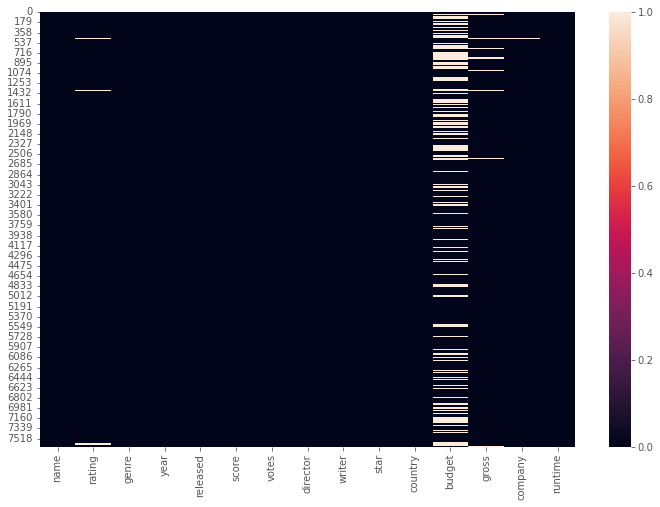

In [8]:
#missing values
sns.heatmap(df.isnull())
plt.show()

In [9]:
#check missing values in the dataset
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [10]:
#get the missing value in percentage
percent_missing = df.isnull().sum()*100/len(df)
# Round to one decimal point
percent_missing = percent_missing.round(2)
percent_missing

name         0.00
rating       1.00
genre        0.00
year         0.00
released     0.03
score        0.04
votes        0.04
director     0.00
writer       0.04
star         0.01
country      0.04
budget      28.31
gross        2.46
company      0.22
runtime      0.05
dtype: float64

In [11]:
#drop all missing values
new_df = df.dropna(axis=0)
print(new_df)

                                                name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes

In [12]:
#check for duplicate values
duplicates = new_df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
7648    False
7649    False
7650    False
7651    False
7652    False
Length: 5421, dtype: bool

In [13]:
#check if there is any duplicate data and delete if there is
duplicate_data = new_df.duplicated().any()
print(duplicate_data)

False


In [14]:
#check data types for columns
new_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
#display title of of each columns
print(new_df.columns)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')


In [16]:
#change the data to dataframe
new_df = pd.DataFrame(new_df)
print(new_df)

                                                name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes

In [17]:
#change the data type of budget, votes, gross and runtime to int data type.
new_df[['budget','gross', 'votes', 'runtime']] = new_df[['budget','gross', 'votes', 'runtime']].astype('int64')
new_df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score    votes  \
0     1980      June 13, 1980 (United States)    8.4   927000   
1     1980       July 2, 1980 (United States)    5.8    65000   
2     1980      June 20, 1980 (United States)    8.7  1200000   
3     1980       July 2, 1980 (United States)    7.7   221000   
4     1980      July 25, 1980 (United States)    7.3   108000   
...    ...                                ...    ...      ...   
7648  2020   January 17, 2020 (United States)    6.6   140000   
7649  2020  February 14, 2020 (United States)    6.5   102000   
7650  2020   January 17, 2020 (United States)    5.6    53000   
7651  2020  February 21, 2020 (United States)    6.8    42000   
7652  2020    August 28, 2020 (United States)    6.8     3700   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.      146  
1                       Columbia Pictures      104  
2                               Lucasfilm      124  
3                      Paramount Pictures       88  
4                          Orion Pictures       98  
...                                   ...      ...  
7648                    Columbia Pictures      124  
7649                   Paramount Pictures       99  
7650                   Universal Pictures      101  
7651                 20th Century Studios      100  
7652  Beijing Diqi Yinxiang Entertainment      149  

[5421 rows x 15 columns]

In [18]:
#to extract month from the released 
new_df['released_month'] = new_df['released'].str.extract(r'([A-Za-z]+)')
new_df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score    votes  \
0     1980      June 13, 1980 (United States)    8.4   927000   
1     1980       July 2, 1980 (United States)    5.8    65000   
2     1980      June 20, 1980 (United States)    8.7  1200000   
3     1980       July 2, 1980 (United States)    7.7   221000   
4     1980      July 25, 1980 (United States)    7.3   108000   
...    ...                                ...    ...      ...   
7648  2020   January 17, 2020 (United States)    6.6   140000   
7649  2020  February 14, 2020 (United States)    6.5   102000   
7650  2020   January 17, 2020 (United States)    5.6    53000   
7651  2020  February 21, 2020 (United States)    6.8    42000   
7652  2020    August 28, 2020 (United States)    6.8     3700   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime released_month  
0                            Warner Bros.      146           June  
1                       Columbia Pictures      104           July  
2                               Lucasfilm      124           June  
3                      Paramount Pictures       88           July  
4                          Orion Pictures       98           July  
...                                   ...      ...            ...  
7648                    Columbia Pictures      124        January  
7649                   Paramount Pictures       99       February  
7650                   Universal Pictures      101        January  
7651                 20th Century Studios      100       February  
7652  Beijing Diqi Yinxiang Entertainment      149         August  

[5421 rows x 16 columns]

In [19]:
#to extract day
new_df['released_day'] = new_df['released'].str.extract(r'(\d{1,2})')
new_df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score    votes  \
0     1980      June 13, 1980 (United States)    8.4   927000   
1     1980       July 2, 1980 (United States)    5.8    65000   
2     1980      June 20, 1980 (United States)    8.7  1200000   
3     1980       July 2, 1980 (United States)    7.7   221000   
4     1980      July 25, 1980 (United States)    7.3   108000   
...    ...                                ...    ...      ...   
7648  2020   January 17, 2020 (United States)    6.6   140000   
7649  2020  February 14, 2020 (United States)    6.5   102000   
7650  2020   January 17, 2020 (United States)    5.6    53000   
7651  2020  February 21, 2020 (United States)    6.8    42000   
7652  2020    August 28, 2020 (United States)    6.8     3700   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime released_month released_day  
0                            Warner Bros.      146           June           13  
1                       Columbia Pictures      104           July            2  
2                               Lucasfilm      124           June           20  
3                      Paramount Pictures       88           July            2  
4                          Orion Pictures       98           July           25  
...                                   ...      ...            ...          ...  
7648                    Columbia Pictures      124        January           17  
7649                   Paramount Pictures       99       February           14  
7650                   Universal Pictures      101        January           17  
7651                 20th Century Studios      100       February           21  
7652  Beijing Diqi Yinxiang Entertainment      149       

In [20]:
#sort the dataframe by gross in descending order
new_df = new_df.sort_values(by=["gross"], inplace=False, ascending = False)
new_df

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             director  \
5445  December 18, 2009 (United States)    7.8  1100000        James Cameron   
7445     April 26, 2019 (United States)    8.4   903000        Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000        James Cameron   
6663  December 18, 2015 (United States)    7.8   876000          J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000        Anthony Russo   
...                                 ...    ...      ...                  ...   
5640          January 15, 2015 (Sweden)    5.8     3500  Francesca Gregorini   
2434         June 4, 1994 (South Korea)    4.5     1900     Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000         John Fawcett   
272      March 12, 1982 (United States)    3.9     2300         Charles Band   
3203           October 1, 1997 (Brazil)    5.7     5800         George Huang   

                       writer               star        country     budget  \
5445            James Cameron    Sam Worthington  United States  237000000   
7445       Christopher Markus  Robert Downey Jr.  United States  356000000   
3045            James Cameron  Leonardo DiCaprio  United States  200000000   
6663          Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244       Christopher Markus  Robert Downey Jr.  United States  321000000   
...                       ...                ...            ...        ...   
5640  Tatiana von Fürstenberg        Rooney Mara  United States    3000000   
2434       Wallace C. Bennett       Brad Johnson  United States    5000000   
3681             Karen Walton      Emily Perkins         Canada    5000000   
272             Alan J. Adler    Robert Glaudini  United States     800000   
3203                Andy Burg       Will Friedle  United States   15000000   

           gross                    company  runtime released_month  \
5445  2847246203      Twentieth Century Fox      162       December   
7445  2797501328             Marvel Studios      181          April   
3045  2201647264      Twentieth Century Fox      194       December   
6663  2069521700                  Lucasfilm      138       December   
7244  2048359754             Marvel Studios      149          April   
...          ...                        ...      ...            ...   
5640        5073           Two Prong Lesson       96        January   
2434        2970           Trimark Pictures       97           June   
3681        2554  Copperheart Entertainment      108            May   
272         2270           Embassy Pictures       85          March   
3203         309                   Daybreak       85        October   

     released_day  
5445           18  
7445           26  
3045           19  
6663           18  
7244           27  
...           ...  
5640           15  
2434            4  
3681           11  
272            12  
3203            1  

[5421 rows x 17 columns]

In [21]:
#to view all the rows with ...
pd.set_option('display.max_rows', None)

In [22]:
#sort the dataframe by gross in descending order
new_df = new_df.sort_values(by=["gross"], inplace=False, ascending = False)
new_df

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

6.4    264
6.6    261
6.2    254
6.5    243
6.7    229
6.1    225
6.8    223
6.3    211
7.0    209
6.9    200
7.3    197
7.2    195
6.0    181
5.8    171
5.9    170
7.1    167
5.6    149
5.7    146
7.5    126
7.4    126
5.5    123
5.4    123
7.6    119
7.7    104
5.3     99
7.8     80
5.1     79
5.2     76
8.0     62
5.0     49
4.9     48
7.9     48
4.8     48
8.1     48
4.7     40
4.6     32
4.5     30
4.3     21
8.2     21
4.4     19
8.3     19
4.2     17
8.4     15
3.7     15
4.1     13
4.0     13
3.8     13
8.5     11
3.9     11
8.6      8
3.4      8
3.5      6
3.2      5
2.5      4
3.0      4
3.6      4
8.8      4
3.3      4
8.7      4
2.2      3
8.9      3
2.7      3
3.1      3
2.9      3
2.8      2
2.4      2
1.9      2
2.1      2
9.0      1
9.3      1
2.3      1
2.6      1
Name: score, dtype: int64


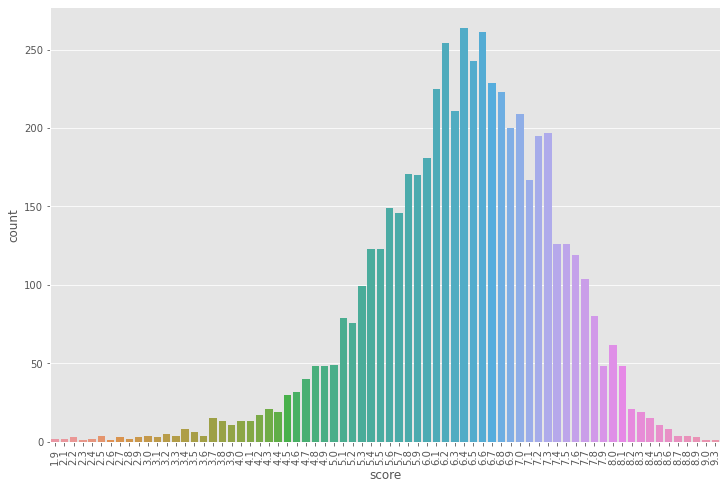

In [23]:
#score of movie
score_count = new_df['score'].value_counts()
print(score_count)

sns.countplot(x='score', data=new_df)
plt.xticks(rotation=90)
plt.show()

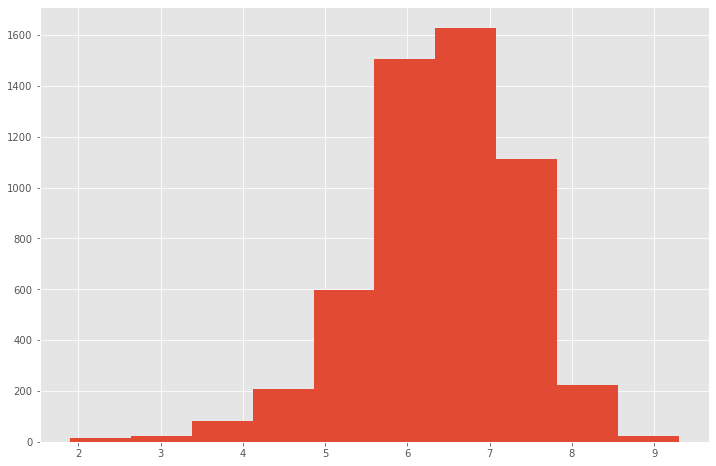

In [24]:
#unserstanding the movie score
plt.hist(new_df['score'])
plt.show()

In [25]:
#display the title of the movie having runtime >= 180
new_df[new_df["runtime"] >= 180]["name"]

7445                                Avengers: Endgame
3045                                          Titanic
4245    The Lord of the Rings: The Return of the King
4659                                        King Kong
3858                                     Pearl Harbor
1649                               Dances with Wolves
6243                          The Wolf of Wall Street
2247                                 Schindler's List
3449                                   The Green Mile
1857                                              JFK
220                                            Gandhi
3461                                         Magnolia
2082                                        Malcolm X
115                                              Reds
5071                                       Grindhouse
2470                                       Wyatt Earp
345                                   The Right Stuff
2749                                            Nixon
4343                        

    year  average_votes
0   2013  194310.559006
1   2014  186797.546012
2   2012  179525.308642
3   2011  172906.250000
4   2010  162330.487805
5   2008  159716.374269
6   2004  149526.721519
7   2007  148943.949045
8   2017  145469.172932
9   2009  145441.520468
10  2016  145153.164557
11  2006  143533.742331
12  2015  143071.794872
13  2020  137962.500000
14  2003  130798.113208
15  2019  127360.132743
16  2005  126581.176471
17  2001  124598.780488
18  1999  119779.629630
19  2002  112873.410405
20  2018  112353.846154
21  1994  104921.875000
22  2000  101550.617284
23  1995   97495.355072
24  1997   96183.892617
25  1998   96060.810811
26  1980   94896.625000
27  1990   67803.603604
28  1993   64444.285714
29  1996   62775.694444
30  1984   60880.613636
31  1991   58049.557522
32  1982   56334.098592
33  1992   55249.618321
34  1985   52972.389474
35  1989   52343.069565
36  1987   51632.701923
37  1986   49763.525253
38  1988   46580.330769
39  1983   44748.614458
40  1981   42848

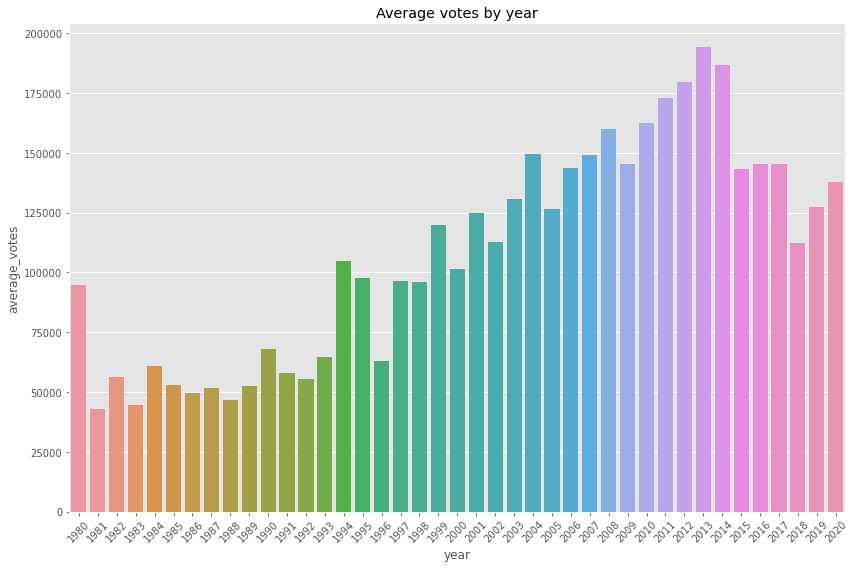

In [26]:
#in which year there was the highest average voting?
average_voting = new_df.groupby('year')['votes'].mean().sort_values(ascending = False)

# Convert Series to DataFrame
average_voting_df = average_voting.reset_index()
average_voting_df.columns = ['year', 'average_votes']
print(average_voting_df)

#plot the graph
sns.barplot(x ='year', y='average_votes', data=average_voting_df)
plt.title("Average votes by year")
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  
plt.show()



                                                 gross
name                                                  
Avatar                                      2847246203
Avengers: Endgame                           2797501328
Titanic                                     2201647264
Star Wars: Episode VII - The Force Awakens  2069521700
Avengers: Infinity War                      2048359754
The Lion King                               1670727580
Jurassic World                              1670516444
The Avengers                                1518815515
Furious 7                                   1515341399
Frozen II                                   1450026933


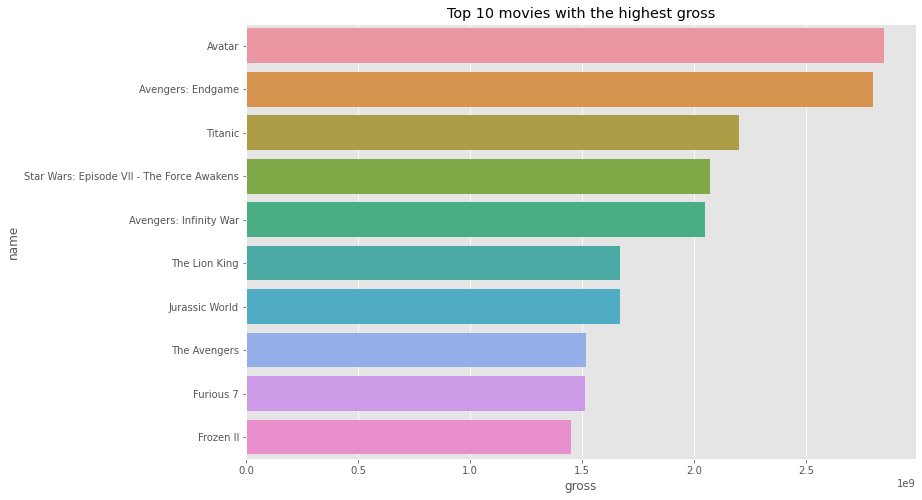

In [27]:
#display top 10 movies title with the highest gross
top10_movies = new_df.nlargest(10, 'gross')[['name', 'gross']]\
.set_index('name')
print(top10_movies)

#visual
sns.barplot(x='gross', y=top10_movies.index, data=top10_movies)
plt.title("Top 10 movies with the highest gross")
plt.show()

    year  average_budget
0   2020    1.076875e+08
1   2019    5.873407e+07
2   2017    5.571203e+07
3   2016    5.560127e+07
4   2013    5.032093e+07
5   2011    4.917956e+07
6   2018    4.904182e+07
7   2012    4.776108e+07
8   2015    4.692132e+07
9   2010    4.666311e+07
10  2014    4.573190e+07
11  2007    4.500325e+07
12  2004    4.428688e+07
13  2009    4.399123e+07
14  2006    4.390000e+07
15  2008    4.376509e+07
16  2005    4.229114e+07
17  2003    4.149956e+07
18  1999    4.121877e+07
19  2001    3.927378e+07
20  2000    3.907562e+07
21  1998    3.689031e+07
22  2002    3.662213e+07
23  1997    3.524795e+07
24  1996    2.878181e+07
25  1995    2.566546e+07
26  1994    2.539262e+07
27  1992    2.021343e+07
28  1991    1.998450e+07
29  1993    1.904750e+07
30  1990    1.823877e+07
31  1989    1.538424e+07
32  1988    1.328715e+07
33  1987    1.314007e+07
34  1986    1.275442e+07
35  1985    1.271853e+07
36  1984    1.260915e+07
37  1982    1.176725e+07
38  1980    1.156625e+07


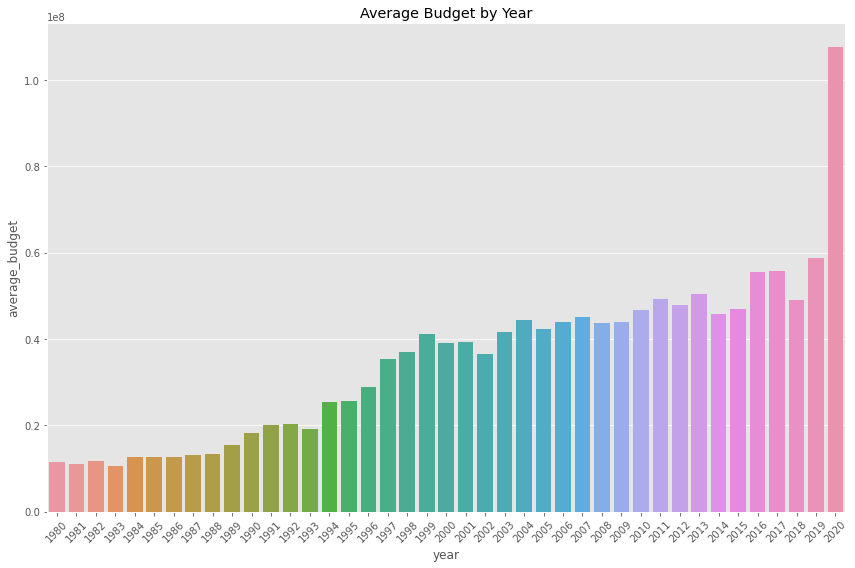

In [28]:
#in which year there was the highest average budget?
# Calculate average budget per year
average_budget = new_df.groupby('year')['budget'].mean().sort_values(ascending=False)

# Convert Series to DataFrame
average_budget_df = average_budget.reset_index()
average_budget_df.columns = ['year', 'average_budget']

# Sort DataFrame by average_budget in descending order
average_budget_df = average_budget_df.sort_values(by='average_budget', ascending=False)

# Print the DataFrame (optional, for verification)
print(average_budget_df)

# Plot the graph
sns.barplot(x='year', y='average_budget', data=average_budget_df)
plt.title("Average Budget by Year")
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  
plt.show()

    year  average_gross
0   2020   2.841127e+08
1   2019   2.450678e+08
2   2017   2.081188e+08
3   2018   1.927169e+08
4   2016   1.762504e+08
5   2015   1.680571e+08
6   2014   1.607302e+08
7   2013   1.596252e+08
8   2012   1.552328e+08
9   2011   1.498019e+08
10  2010   1.328565e+08
11  2009   1.323977e+08
12  2007   1.226607e+08
13  2008   1.223059e+08
14  2004   1.147133e+08
15  2006   1.096732e+08
16  2003   1.081816e+08
17  2005   1.022235e+08
18  2002   9.503332e+07
19  2001   9.375281e+07
20  1997   8.501497e+07
21  1999   8.161126e+07
22  2000   8.136492e+07
23  1998   7.335474e+07
24  1994   6.527944e+07
25  1996   6.301720e+07
26  1995   6.183214e+07
27  1990   5.477707e+07
28  1993   5.188667e+07
29  1992   4.950053e+07
30  1991   4.898839e+07
31  1989   4.846537e+07
32  1980   4.429196e+07
33  1982   3.804393e+07
34  1985   3.403673e+07
35  1984   3.396954e+07
36  1988   3.347553e+07
37  1987   3.228688e+07
38  1986   2.964930e+07
39  1981   2.918663e+07
40  1983   2.796

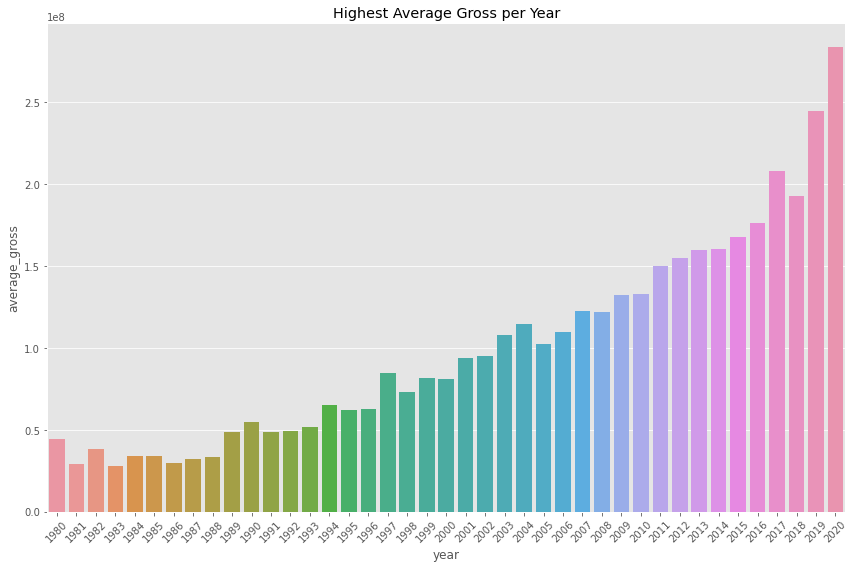

In [29]:
#in which year there was the highest average gross
highest_gross = new_df.groupby('year')['gross'].mean().sort_values(ascending=False)

# Convert Series to DataFrame
highest_gross_df = highest_gross.reset_index()
highest_gross_df.columns = ['year', 'average_gross']

# Print the DataFrame (optional, for verification)
print(highest_gross_df)

#plot the graph
sns.barplot(x='year', y='average_gross', data=highest_gross_df)
plt.title("Highest Average Gross per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



                                                  budget       gross
name                                                                
Avengers: Endgame                              356000000  2797501328
Avengers: Infinity War                         321000000  2048359754
Star Wars: Episode VIII - The Last Jedi        317000000  1332698830
Pirates of the Caribbean: at World's End       300000000   960996492
Justice League                                 300000000   657926987
Star Wars: Episode IX - The Rise of Skywalker  275000000  1078232589
Solo: A Star Wars Story                        275000000   392924807
Superman Returns                               270000000   391081192
The Lion King                                  260000000  1670727580
Tangled                                        260000000   592462816


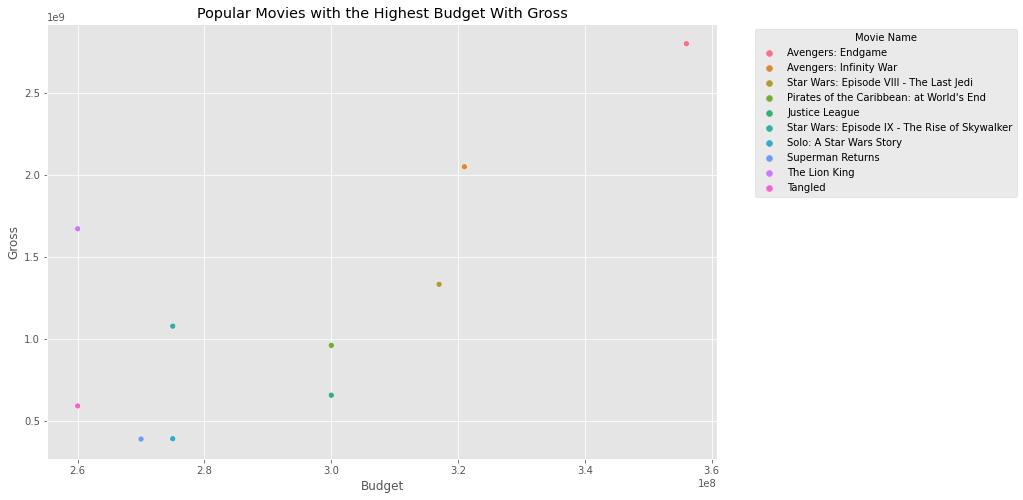

In [30]:
#Popular movie with the highest budget and gross
popular_movie = new_df.nlargest(10, 'budget')[['name', 'budget','gross']].set_index('name')

print(popular_movie)

# Create a scatter plot
sns.scatterplot(x='budget', y='gross', hue=popular_movie.index, data=popular_movie)
plt.title("Popular Movies with the Highest Budget With Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.legend(title='Movie Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


                       budget      gross
name                                    
Following                6000      48482
El Mariachi              7000    2040920
Primer                   7000     545436
Paranormal Activity     15000  193355800
The Living End          22769     692585
Slacker                 23000    1228108
In the Company of Men   25000    2804473
Clerks                  27000    3151130
Ratcatcher              30000     217244
Upstream Color          50000     587174


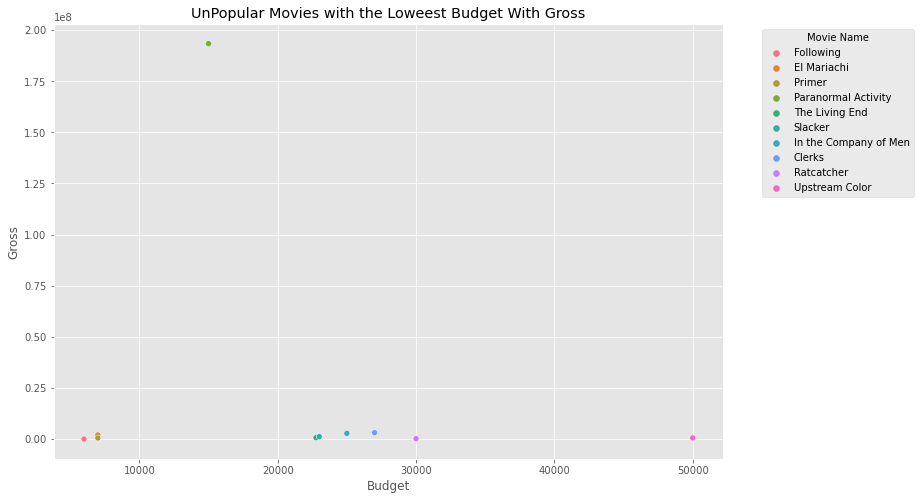

In [31]:
#UnPopular movie with the lowest budget and gross
popular_movie = new_df.nsmallest(10, 'budget')[['name', 'budget','gross']].set_index('name')

print(popular_movie)

# Create a scatter plot
sns.scatterplot(x='budget', y='gross', hue=popular_movie.index, data=popular_movie)
plt.title("UnPopular Movies with the Loweest Budget With Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.legend(title='Movie Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

               director  average_score
0       Roberto Benigni           8.60
1             Tony Kaye           8.50
2         Nadine Labaki           8.40
3       Bob Persichetti           8.40
4          Sergio Leone           8.40
5       Stanley Kubrick           8.35
6           Lee Unkrich           8.30
7          Majid Majidi           8.30
8    Giuseppe Tornatore           8.30
9  Juan José Campanella           8.20


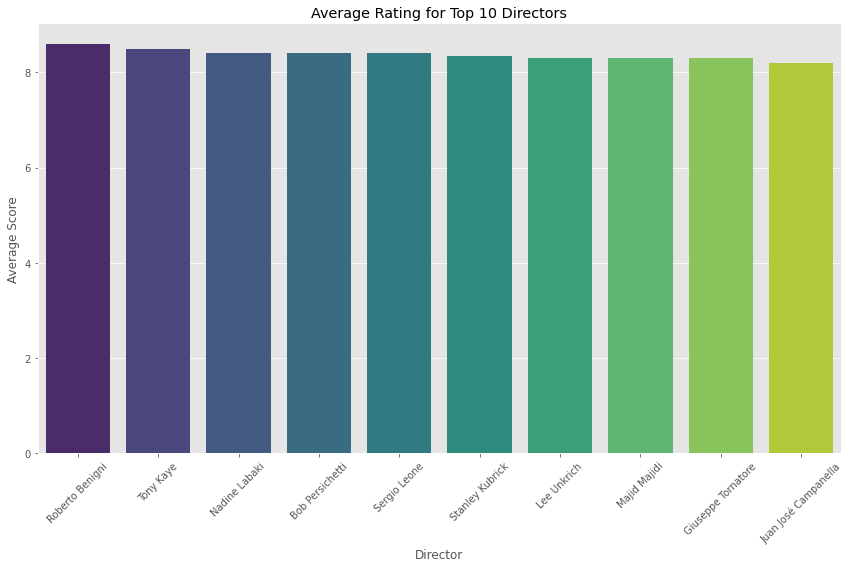

In [32]:
# Compute the average score for each director
directors_rating = new_df.groupby('director')['score'].mean().sort_values(ascending=False).head(10)

# Convert Series to DataFrame
directors_rating_df = directors_rating.reset_index()
directors_rating_df.columns = ['director', 'average_score']

# Print the DataFrame (optional, for verification)
print(directors_rating_df)

# Plot the average ratings for the top 10 directors
sns.barplot(x='director', y='average_score', data=directors_rating_df, palette='viridis')
plt.title("Average Rating for Top 10 Directors")
plt.xlabel("Director")
plt.ylabel("Average Score")
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

                                               runtime
name                                                  
Gettysburg                                         271
Hamlet                                             242
Once Upon a Time in America                        229
Gods and Generals                                  219
Heaven's Gate                                      219
Kabhi Khushi Kabhie Gham...                        210
The Irishman                                       209
Malcolm X                                          202
The Lord of the Rings: The Return of the King      201
Schindler's List                                   195


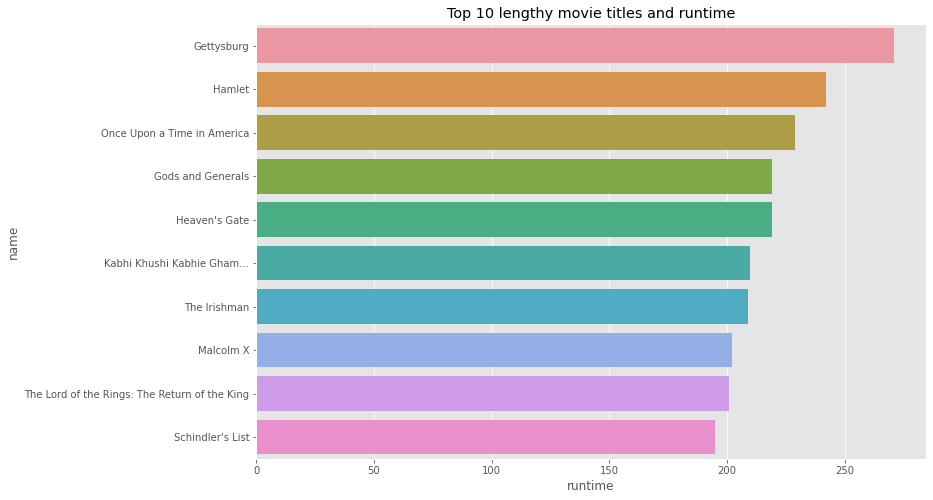

In [33]:
#display top 10 lengthy movies title and runtime
top10_movies = new_df.nlargest(10, 'runtime')[['name', 'runtime']]\
.set_index('name')
print(top10_movies)

#visual
sns.barplot(x='runtime', y=top10_movies.index, data=top10_movies)
plt.title("Top 10 lengthy movie titles and runtime")
plt.show()

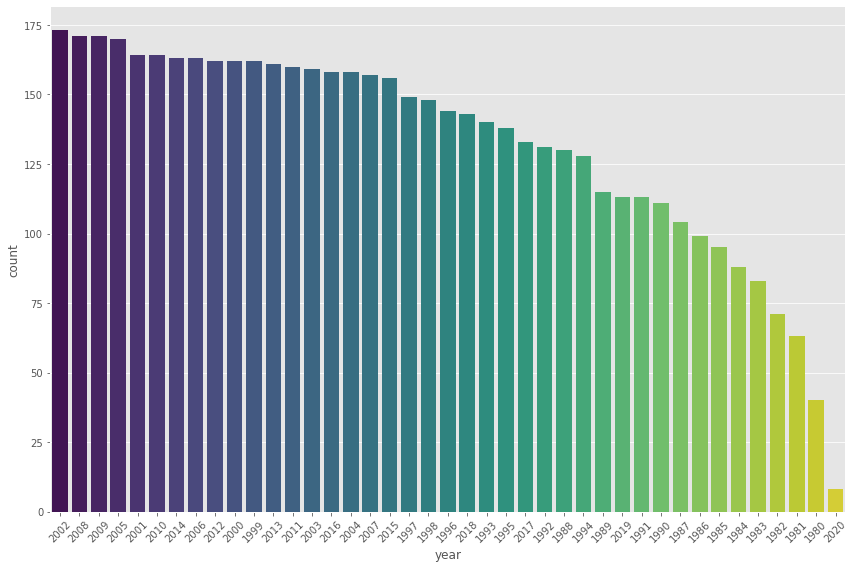

In [34]:
#get number of movies per year
#plot
sns.countplot(x='year', data=new_df, order=new_df["year"].value_counts().index, palette='viridis')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  
plt.show()

In [35]:
#find most popular movie title(Highest budget)
new_df[new_df['budget'].max() == new_df['budget']]['name']

7445    Avengers: Endgame
Name: name, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

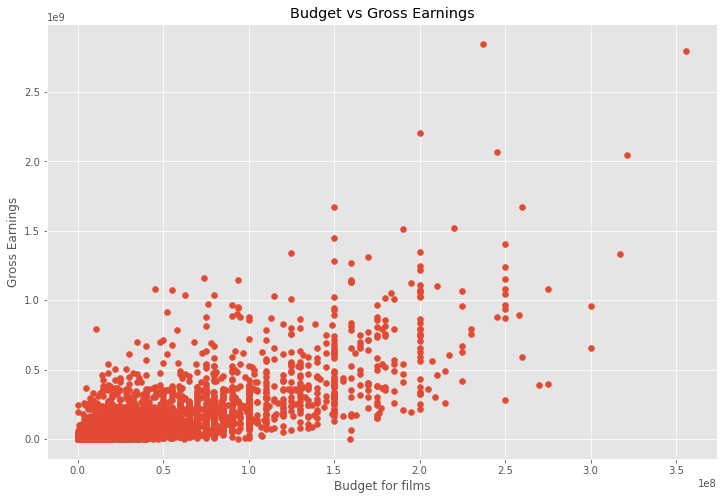

In [36]:
#Scatter plot with budget vs gross
plt.scatter(x=new_df["budget"], y=new_df["gross"])
plt.title("Budget vs Gross Earnings")
plt.ylabel("Gross Earnings")
plt.xlabel("Budget for films")
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

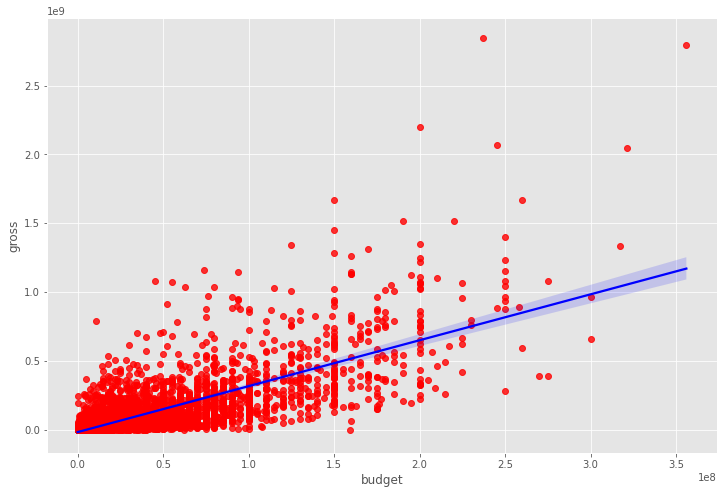

In [37]:
#plot budget vs gross using seaborn
sns.regplot(x="budget", y="gross", data=new_df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [38]:
#lets look at the correlation
new_df.corr() #pearson correllation by default

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [39]:
#lets look ath the correlation
new_df.corr(method = 'kendall') #kendal correllation

year     score     votes    budget     gross   runtime
year     1.000000  0.039389  0.296512  0.220833  0.239539  0.064824
score    0.039389  1.000000  0.350185 -0.006406  0.124943  0.292254
votes    0.296512  0.350185  1.000000  0.346274  0.553625  0.205344
budget   0.220833 -0.006406  0.346274  1.000000  0.512057  0.231278
gross    0.239539  0.124943  0.553625  0.512057  1.000000  0.176979
runtime  0.064824  0.292254  0.205344  0.231278  0.176979  1.000000

In [40]:
#lets look ath the correlation
new_df.corr(method = 'spearman') #spearman correllation

year     score     votes    budget     gross   runtime
year     1.000000  0.057741  0.427623  0.312886  0.351045  0.095444
score    0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155
votes    0.427623  0.495409  1.000000  0.493461  0.745793  0.300621
budget   0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794
gross    0.351045  0.183192  0.745793  0.692958  1.000000  0.257400
runtime  0.095444  0.412155  0.300621  0.330794  0.257400  1.000000

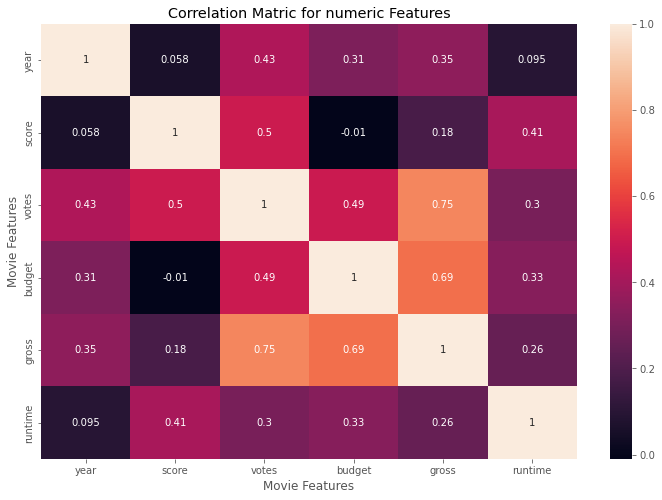

In [41]:
#correllation visuals
correllation_matrix = new_df.corr(method = 'spearman')
sns.heatmap(correllation_matrix, annot=True)
plt.title("Correlation Matric for numeric Features")
plt.ylabel("Movie Features")
plt.xlabel("Movie Features")
plt.show()

In [42]:
#Country with the highest moview
new_df['country'].value_counts()

United States                     4319
United Kingdom                     492
Canada                             111
France                             105
Germany                             82
Australia                           42
Japan                               28
China                               26
Hong Kong                           24
Ireland                             21
Italy                               19
Spain                               18
New Zealand                         18
South Korea                         13
Mexico                              11
Denmark                             10
India                                8
Czech Republic                       7
Sweden                               5
Belgium                              4
South Africa                         4
Russia                               4
Switzerland                          4
Norway                               3
West Germany                         3
Taiwan                   

                country  average_gross
0                 Malta   3.527941e+08
1           New Zealand   3.487975e+08
2               Finland   2.500630e+08
3                 China   2.425353e+08
4          South Africa   1.379522e+08
5         United States   1.090055e+08
6                Taiwan   9.585037e+07
7        United Kingdom   9.217826e+07
8                 Japan   8.907907e+07
9  United Arab Emirates   8.858613e+07


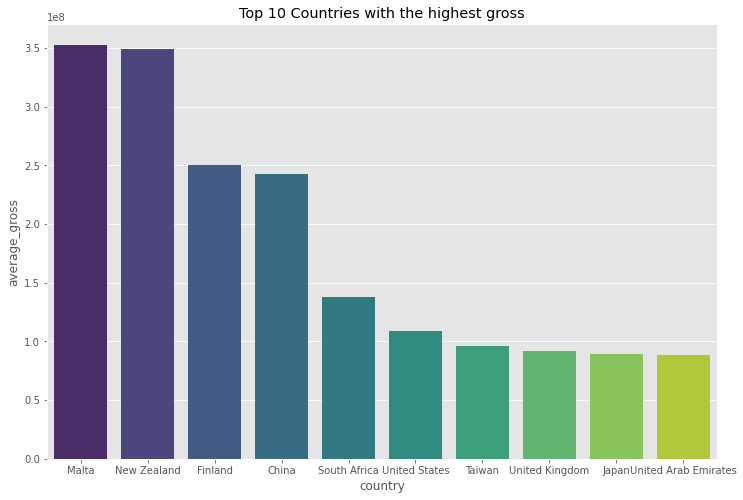

In [42]:
#country with the highest gross
country_gross = new_df.groupby('country')['gross'].mean().sort_values(ascending=False).head(10)
country_gross_df = country_gross.reset_index()
country_gross_df.columns = ['country', 'average_gross']

print(country_gross_df)

#visual
sns.barplot(x='country', y='average_gross', data=country_gross_df, palette='viridis')
plt.title("Top 10 Countries with the highest gross")
plt.show()


        genre  count
0      Comedy   1496
1      Action   1415
2       Drama    863
3       Crime    399
4   Adventure    327
5   Biography    311
6   Animation    277
7      Horror    251
8     Fantasy     41
9     Mystery     17
10   Thriller      7
11     Sci-Fi      6
12    Romance      5
13     Family      4
14    Western      2


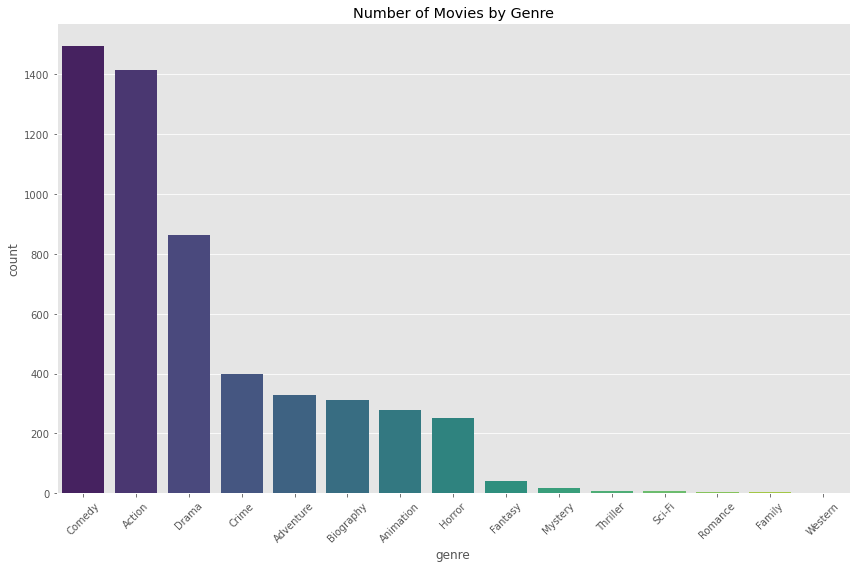

In [43]:
#Total number on genre produced
# Calculate the count of each genre
genre_counts = new_df['genre'].value_counts()

# Convert Series to DataFrame
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['genre', 'count']

# Print the DataFrame (optional, for verification)
print(genre_counts_df)

# Plot the graph
sns.barplot(x='genre', y='count', data=genre_counts_df, palette='viridis')
plt.title("Number of Movies by Genre")
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  
plt.show()

        genre  average_gross
0      Family   5.185831e+08
1   Animation   2.811044e+08
2      Action   1.680232e+08
3   Adventure   1.332682e+08
4     Mystery   1.178877e+08
5   Biography   6.139527e+07
6       Drama   6.036914e+07
7      Comedy   5.916766e+07
8      Horror   5.681695e+07
9       Crime   5.016958e+07
10   Thriller   4.248814e+07
11    Fantasy   3.987870e+07
12     Sci-Fi   3.761010e+07
13    Romance   3.357538e+07
14    Western   1.001294e+07


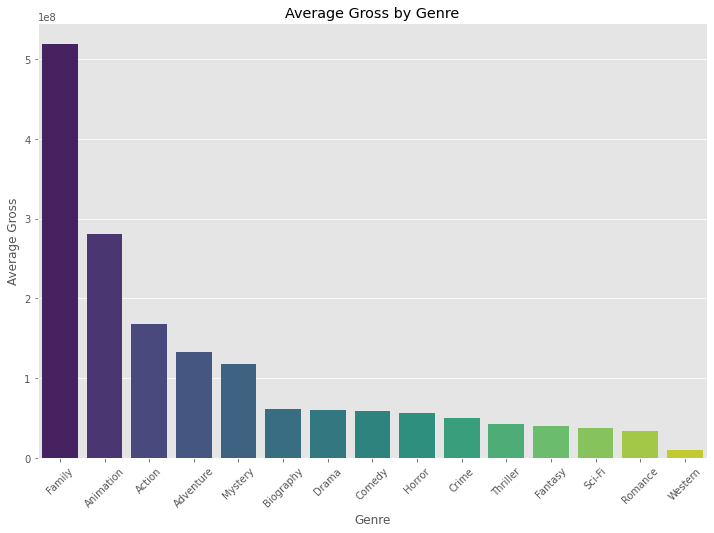

In [44]:
#Average Gross by Genre
genre_gross = new_df.groupby('genre')['gross'].mean().sort_values(ascending=False)
genre_gross_df = genre_gross.reset_index()
genre_gross_df.columns = ['genre', 'average_gross']

print(genre_gross_df)

# Visualize
sns.barplot(x='genre', y='average_gross', data=genre_gross_df, palette='viridis')
plt.title("Average Gross by Genre")
plt.xlabel('Genre')
plt.ylabel('Average Gross')
plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
plt.show()

      Rating  Count
0          R   2597
1      PG-13   1729
2         PG    907
3          G    111
4  Not Rated     44
5    Unrated     17
6      NC-17     12
7      TV-MA      2
8   Approved      1
9          X      1


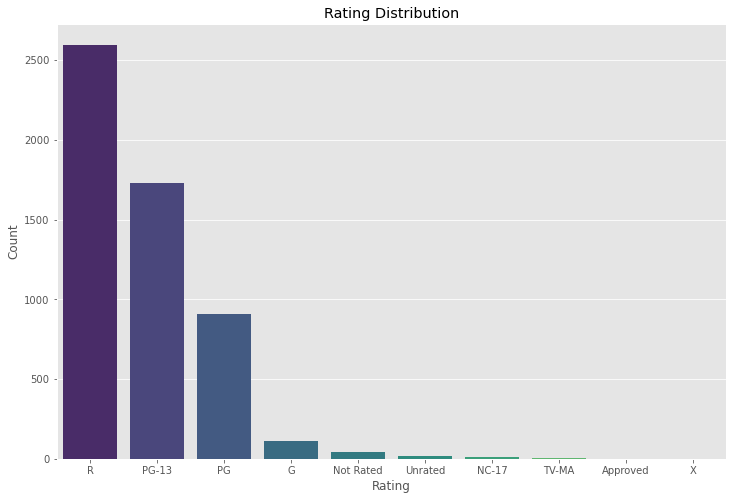

In [45]:
#Rating distribution
# Calculate rating distribution
rating_distribution = new_df['rating'].value_counts().reset_index()
rating_distribution.columns = ['Rating', 'Count']
print(rating_distribution)

# Plotting the bar chart
sns.barplot(x='Rating', y='Count', data=rating_distribution, palette='viridis')

# Adding title and labels
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")

# Show the plot
plt.show()